# Rule Based Machine Learning

We talked about a wide variety of algorithms this module but we're going to concentrate on just two: Decision Trees and Random Forests.

**Problem 1.**

Decision Trees create a model based on rules. Your main goal for your experiments in this Lab is to explore here is when does this approach work well and when does it fail. Concentrating on classification, some points to consider are:

1. Try rules with just categorical predictors, just numerical, combinations. Does this seem to make a difference?
2. If you wrote out a Decision Tree, and generated data from it, does CART (the algorithm used in `scikit-learn`) recover it?
3. What does it mean for a leaf to be heterogenous (impure) or homogenous (pure) in terms of missing variables (known unknowns and unknown unknowns)? How can you factor that into creating data and regenerating the tree? (HINT: your attempts so far are likely to have resulted in perfect trees...why? What do you have to do or assume to get "noisy" data and learn imperfect rules?)
4. Does the distribution of class labels or specific examples of class labels change the result?
5. How do you factor in numerical inputs? What happens if you add an "oblique" relationship?

You will learn more out of this assignment if you explore all these avenues in depth. This Lab is actually one of the most challenging!

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Make up the data for 3 classes with one single underlying classification of (1,2,3) where:
- if class=1:  $X_1 = N(2,1) , X_2=N(2,1)$
- if class=2:  $X_1 = N(5,1) , X_2=N(5,1)$
- if class=3:  $X_1 = N(8,1) , X_2=N(8,1)$

In [2]:
np.random.seed(0)

In [3]:
size = 100
stddev = 1

# Generate samples for 3 hidden classes of data
classes = np.random.randint(low=1, high=4, size=size)
x1s = []
x2s = []
ys = []
for cl in classes:
    if cl == 1:
        ys.append(1)
        x1s.append(np.random.normal(loc=2, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=2, scale=stddev, size=1))
    if cl == 2:
        ys.append(2)
        x1s.append(np.random.normal(loc=5, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=5, scale=stddev, size=1))
    if cl == 3:
        ys.append(3)
        x1s.append(np.random.normal(loc=8, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=8, scale=stddev, size=1))

X = pd.DataFrame.from_records(data=zip(x1s,x2s), columns=['X1','X2'])
#X.loc[0:5, 'X1'], x1s[:5]
y = pd.DataFrame(ys)

In [4]:
print(X.describe())
print('-----------------------------------------')
print(y.describe())

                     X1               X2
count               100              100
unique              100              100
top     [6.63732887366]  [9.13312702927]
freq                  1                1
-----------------------------------------
               0
count  100.00000
mean     1.88000
std      0.80754
min      1.00000
25%      1.00000
50%      2.00000
75%      3.00000
max      3.00000


Would be very helpful to plot the data.

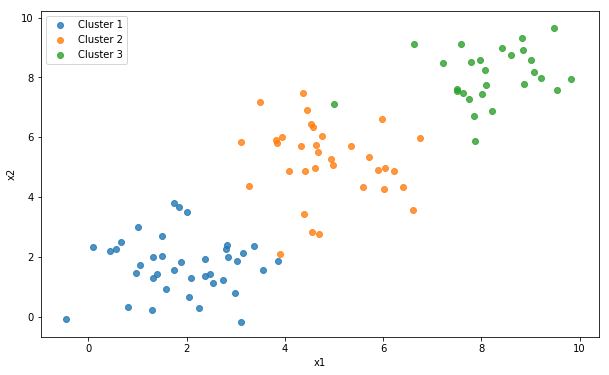

In [5]:
plt.figure(figsize=(10,6))
X_temp = X[:]
X_temp['cl'] = y

for i in [1, 2, 3]:
    X_cl = X_temp[X_temp['cl']==i]
    plt.scatter(X_cl['X1'], X_cl['X2'], label='Cluster {}'.format(i), alpha=0.8)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

Use DecisionTreeClassifier to do the classification and review the accuracy.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


It is obvious the decision tree is overfitting the training data (accuracy=1.00). The performance on the test data is less impressive.

In [7]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render('Classification')
'''

"\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render('Classification')\n"

In [8]:
#clf.predict_proba(X_train)

We can limit the max depth to 3.

In [9]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


It didn't change at all. Try limit the max depth to 1.

In [10]:
clf3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf3.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


Hmm I guess the reason behind this is that the data are synthetic and well seperated, therefore the decision tree had a depth of only 1 to fit the data.

What happens if we blend 2 of the classes together to make the data points bleed into each other? Try shifting the 2nd and 3rd classes so that there is an increased overlap:
- if class 1:  $X_1 = N(2,1), X_2 = N(2,1)$
- if class 2:  $X_1 = N(6,1), X_2 = N(6,1)$
- if class 3:  $X_1 = N(8,1), X_2 = N(6,1)$

In [11]:
np.random.seed(0)

In [12]:
size = 100
stddev = 1

# Generate samples for 3 hidden classes of data
classes = np.random.randint(low=1, high=4, size=size)
x1s = []
x2s = []
ys = []
for cl in classes:
    if cl == 1:
        ys.append(1)
        x1s.append(np.random.normal(loc=2, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=2, scale=stddev, size=1))
    if cl == 2:
        ys.append(2)
        x1s.append(np.random.normal(loc=6, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=6, scale=stddev, size=1))
    if cl == 3:
        ys.append(3)
        x1s.append(np.random.normal(loc=8, scale=stddev, size=1))
        x2s.append(np.random.normal(loc=6, scale=stddev, size=1))

X = pd.DataFrame.from_records(data=zip(x1s,x2s), columns=['X1','X2'])
#X.loc[0:5, 'X1'], x1s[:5]
y = pd.DataFrame(ys)

Plot the data.

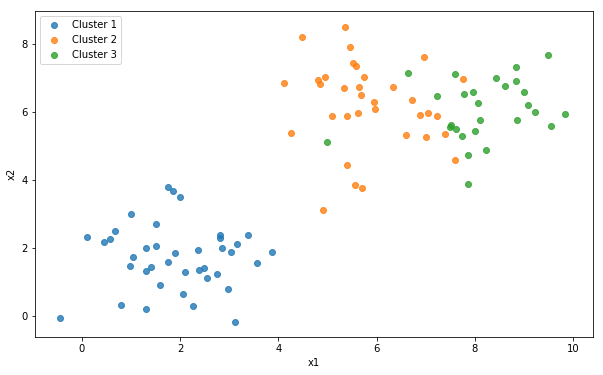

In [13]:
plt.figure(figsize=(10,6))
X_temp = X[:]
X_temp['cl'] = y

for i in [1, 2, 3]:
    X_cl = X_temp[X_temp['cl']==i]
    plt.scatter(X_cl['X1'], X_cl['X2'], label='Cluster {}'.format(i), alpha=0.8)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

Use DecisionTreeClassifier to do the classification and review the accuracy.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


Again the decision tree is overfitting the training set (accuracy=1.00) while the test set is only 0.80.

Try different max depth and look the learning curve.

In [15]:
train_acc = []
test_acc = []

for depth in list(range(1,11)):
    clf = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

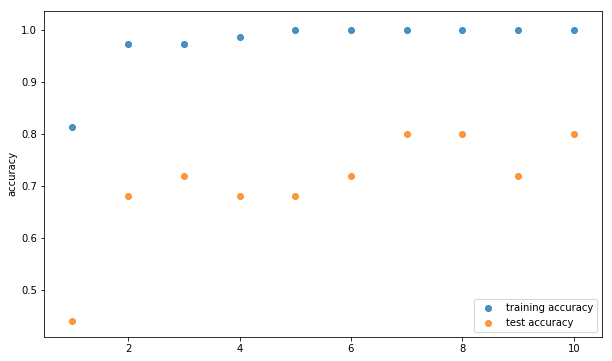

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(list(range(1,11)), train_acc, label='training accuracy', alpha=0.8)
plt.scatter(list(range(1,11)), test_acc, label='test accuracy', alpha=0.8)
plt.ylabel('accuracy')
plt.legend()

The accuracy definitely improved from max depth being 1 to being 2. But from there on the training accuracy is very close to 1.0 and barely changes while the test accuracy fluctuates. I think it might need even more fuzzy boundaries between classes to show the effects of decision tree learning.

** Problem 2.**

Decision Trees can also be used for regression. Generate data (or use previous data) for several regression problems. Include at least a "vanilla" regression problem, a problem with non-linearities and a problem with "bend" (have one generative model for values below some $x_{ij}$ and a different model for values above it. Compare the results with regular linear regression both in terms of accuracy and interpretability.

I will use a simple linear relationship $Y = 5 + 2.3 X_1 + \epsilon$, as taken from the Module 10 lab:

- $X_1$ is uniformly randomly distributed from (0,10) 
- $\epsilon = N(0,1)$

In [17]:
np.random.seed(0)

Generate data look at summary.

In [18]:
def p2_q1_data(e=1):
    X1 = np.random.uniform(low=0, high=10, size=500)
    es = np.random.normal(loc=0, scale=e, size=500)
    Y = [5 + (2.3 * x) + e for x,e in zip(X1, es)]
    return pd.DataFrame.from_records(data=zip(Y,X1), columns=['Y','X1'])

data = p2_q1_data()

In [19]:
data.describe()

,Y,X1
count,500.000000,500.000000
mean,16.321628,4.965976
std,6.790702,2.917564
min,2.452377,0.046955
25%,10.699644,2.478259
50%,15.891708,4.868419
75%,22.004422,7.307458
max,28.768267,9.988470


Plot the data.

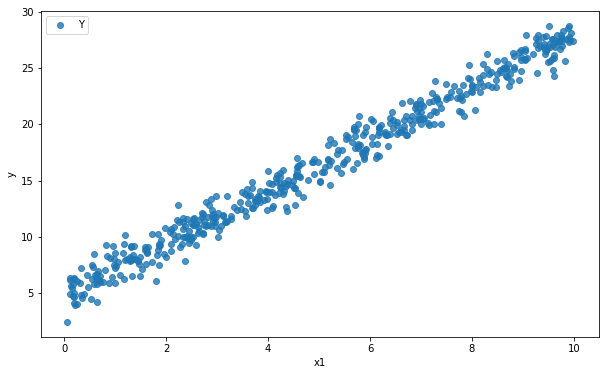

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(data['X1'], data['Y'], alpha=0.8)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

Looks just like expected, a good linear relationship.

Reshape data and perform decision tree regression.

In [21]:
X = data['X1'].reshape(-1, 1)
y = data['Y'].reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
reg = DecisionTreeRegressor().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(reg.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(reg.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.96


The score is pretty good for both training and test set.

We can plot the data along with the regression line.

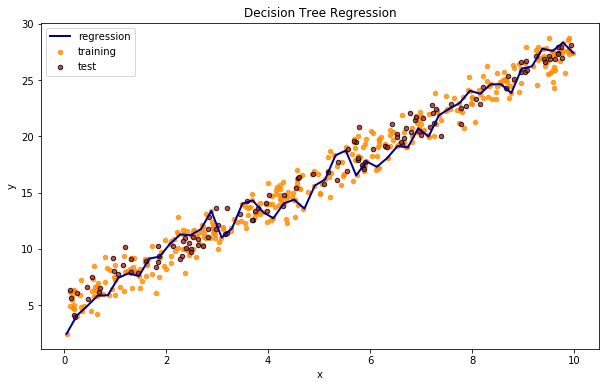

In [24]:
xs = np.linspace(X.min(), X.max()).reshape(-1, 1)

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, s=20, c="darkorange", label="training", alpha=0.8)
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="firebrick", label="test", alpha=0.8)
plt.plot(xs, reg.predict(xs), color="darkblue", label="regression", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

The regression line is a fluid jagged line reacting sensitively to the noise. It certainly looks close to KNN regression.

Try a non-linear relationship
$Y = 5 + 2(X_1^2) + \epsilon$, where:
- $X_1$ is uniformly randomly distributed from (0,5)
- $\epsilon = N(0,1)$

In [25]:
np.random.seed(0)

In [26]:
def p2_q2_data(e=1):
    X1 = np.random.uniform(low=0, high=5, size=500)
    es = np.random.normal(loc=0, scale=e, size=500)
    Y = [5 + (2 * x**2) + e for x,e in zip(X1,es)]
    return pd.DataFrame.from_records(data=zip(Y,X1), columns=['Y','X1'])
    
data = p2_q2_data()

In [27]:
data.describe()

,Y,X1
count,500.000000,500.000000
mean,21.477922,2.482988
std,15.281217,1.458782
min,2.345483,0.023477
25%,8.167946,1.239129
50%,16.376823,2.434210
75%,32.105472,3.653729
max,54.958428,4.994235


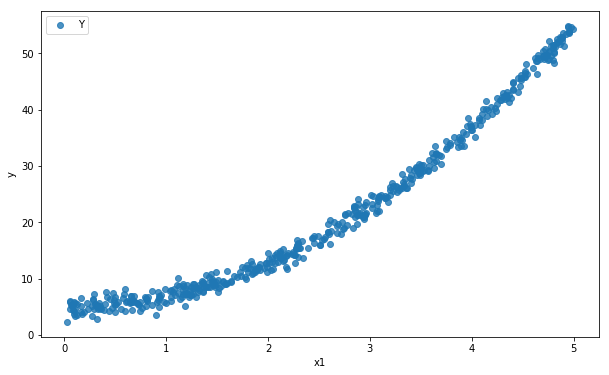

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(data['X1'], data['Y'], alpha=0.8)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

Looks just like expected, a curved polynomial relationship.

Reshape data and perform decision tree regression.

In [29]:
X = data['X1'].reshape(-1, 1)
y = data['Y'].reshape(-1, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = DecisionTreeRegressor().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(reg.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(reg.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


The score is amazingly good for both training and test set!

We can plot the data along with the regression line.

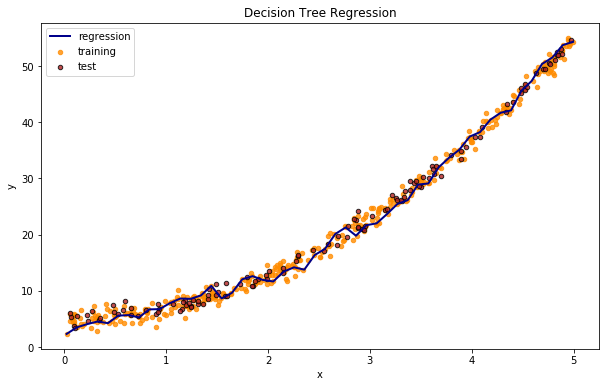

In [31]:
xs = np.linspace(X.min(), X.max()).reshape(-1, 1)

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, s=20, c="darkorange", label="training", alpha=0.8)
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="firebrick", label="test", alpha=0.8)
plt.plot(xs, reg.predict(xs), color="darkblue", label="regression", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Similar to KNN Regression, the decision tree regression clearly does a much better job of predicting non-linear relationship than linear regression does. The regression line is a fluid jagged line reacting very closely to the training data.

Try different max depth and compare the results.

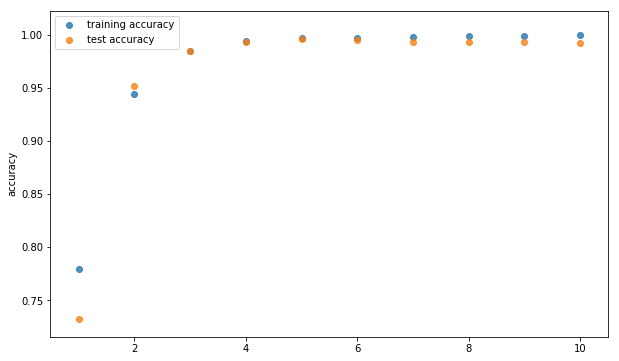

In [32]:
train_acc = []
test_acc = []

for depth in list(range(1,11)):
    reg = DecisionTreeRegressor(max_depth = depth).fit(X_train, y_train)
    train_acc.append(reg.score(X_train, y_train))
    test_acc.append(reg.score(X_test, y_test))
    

plt.figure(figsize=(10,6))

plt.scatter(list(range(1,11)), train_acc, label='training accuracy', alpha=0.8)
plt.scatter(list(range(1,11)), test_acc, label='test accuracy', alpha=0.8)
plt.ylabel('accuracy')
plt.legend()

Interestingly, the regression's learning curve has a similar trend to that of classification. The accuracy definitely improved from max depth being 1 to 2 and to 3. From there on the training accuracy is very close to 1.0 and barely changes while the test accuracy drops slowly. It shows the decision tree can work well with both classification and regression problems. It does not distinguish between the two.

ref: http://scikit-learn.org/stable/modules/tree.html